In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [25]:
# Membaca dataset
df_UCIHeartDiseaseData = pd.read_csv(r'D:\File Kuliah\SMT 3\Data Mining/heart_disease_uci.csv')

In [26]:
# Menampilkan 5 data teratas
display(df_UCIHeartDiseaseData.head())
# Menampilkan 5 data terbawah
display(df_UCIHeartDiseaseData.tail())


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [27]:
# Melihat informasi tentang dataset (tipe data, jumlah entri, jumlah kolom)
df_UCIHeartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [28]:
# Mengecek data yang hilang
df_UCIHeartDiseaseData.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [29]:
# Memilih hanya kolom numerik
df_numerik = df_UCIHeartDiseaseData.select_dtypes(include=[float, int])

# Menghitung Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df_numerik.quantile(0.25)
Q3 = df_numerik.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menyaring outliers
outliers = ((df_numerik < batas_bawah) | (df_numerik > batas_atas))

# Menampilkan outliers untuk setiap kolom
print(outliers.sum())

id            0
age           0
trestbps     28
chol        183
thalch        2
oldpeak      16
ca           20
num           0
dtype: int64


In [30]:
mean = df_numerik.mean()
median = df_numerik.median()
mode = df_numerik.mode().iloc[0]  # mode() mengembalikan DataFrame, ambil baris pertama
std_dev = df_numerik.std()
variance = df_numerik.var()
skewness = df_numerik.skew()
kurtosis = df_numerik.kurtosis()

# Menampilkan statistik deskriptif
print("Mean:")
print(mean)
print("\nMedian:")
print(median)
print("\nMode:")
print(mode)
print("\nStandard Deviation:")
print(std_dev)
print("\nVariance:")
print(variance)
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Mean:
id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64

Median:
id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64

Mode:
id            1.0
age          54.0
trestbps    120.0
chol          0.0
thalch      150.0
oldpeak       0.0
ca            0.0
num           0.0
Name: 0, dtype: float64

Standard Deviation:
id          265.725422
age           9.424685
trestbps     19.066070
chol        110.780810
thalch       25.926276
oldpeak       1.091226
ca            0.935653
num           1.142693
dtype: float64

Variance:
id          70610.000000
age            88.824691
trestbps      363.515007
chol        12272.387943
thalch        672.171813
oldpeak         1.190775
ca              0.875447
num             1.305748
dtype: float64

Skewn

In [31]:
# Menghitung korelasi antar variabel numerik
korelasi = df_numerik.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(korelasi)


Matriks Korelasi:
                id       age  trestbps      chol    thalch   oldpeak  \
id        1.000000  0.239301  0.052924 -0.376936 -0.466427  0.049930   
age       0.239301  1.000000  0.244253 -0.086234 -0.365778  0.258243   
trestbps  0.052924  0.244253  1.000000  0.092853 -0.104899  0.161908   
chol     -0.376936 -0.086234  0.092853  1.000000  0.236121  0.047734   
thalch   -0.466427 -0.365778 -0.104899  0.236121  1.000000 -0.151174   
oldpeak   0.049930  0.258243  0.161908  0.047734 -0.151174  1.000000   
ca        0.061433  0.370416  0.093705  0.051606 -0.264094  0.281817   
num       0.273552  0.339596  0.122291 -0.231547 -0.366265  0.443084   

                ca       num  
id        0.061433  0.273552  
age       0.370416  0.339596  
trestbps  0.093705  0.122291  
chol      0.051606 -0.231547  
thalch   -0.264094 -0.366265  
oldpeak   0.281817  0.443084  
ca        1.000000  0.516216  
num       0.516216  1.000000  


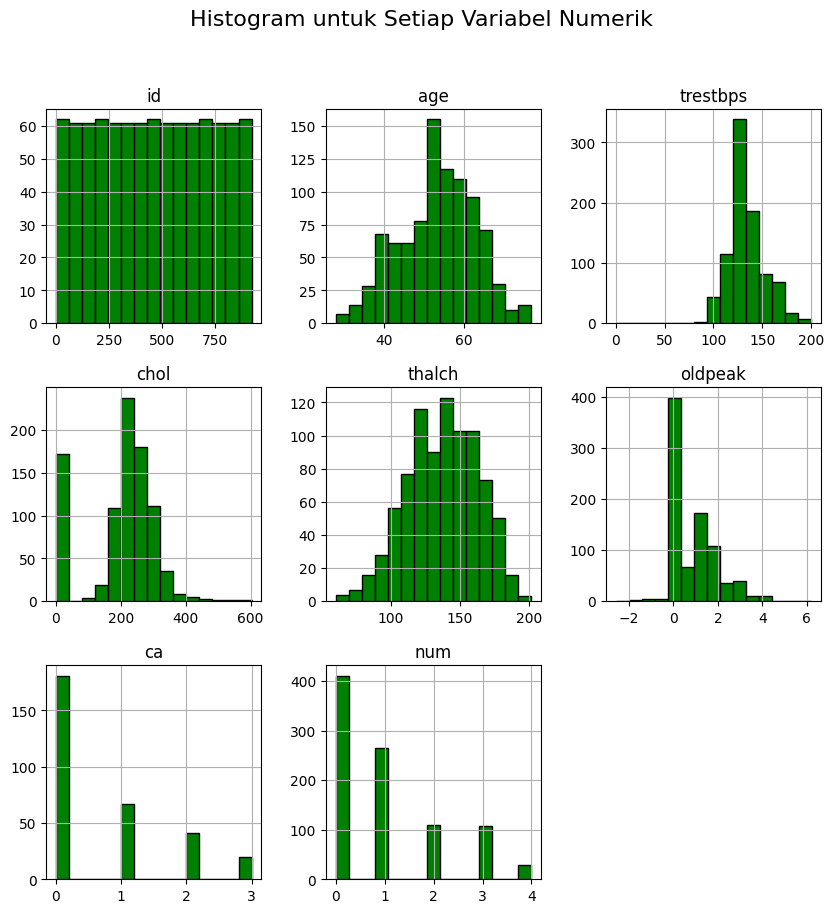

In [32]:
# Membuat histogram untuk setiap variabel numerik
df_numerik.hist(bins=15, figsize=(10, 10), color='green', edgecolor='black')
plt.suptitle('Histogram untuk Setiap Variabel Numerik', fontsize=16)
plt.show()

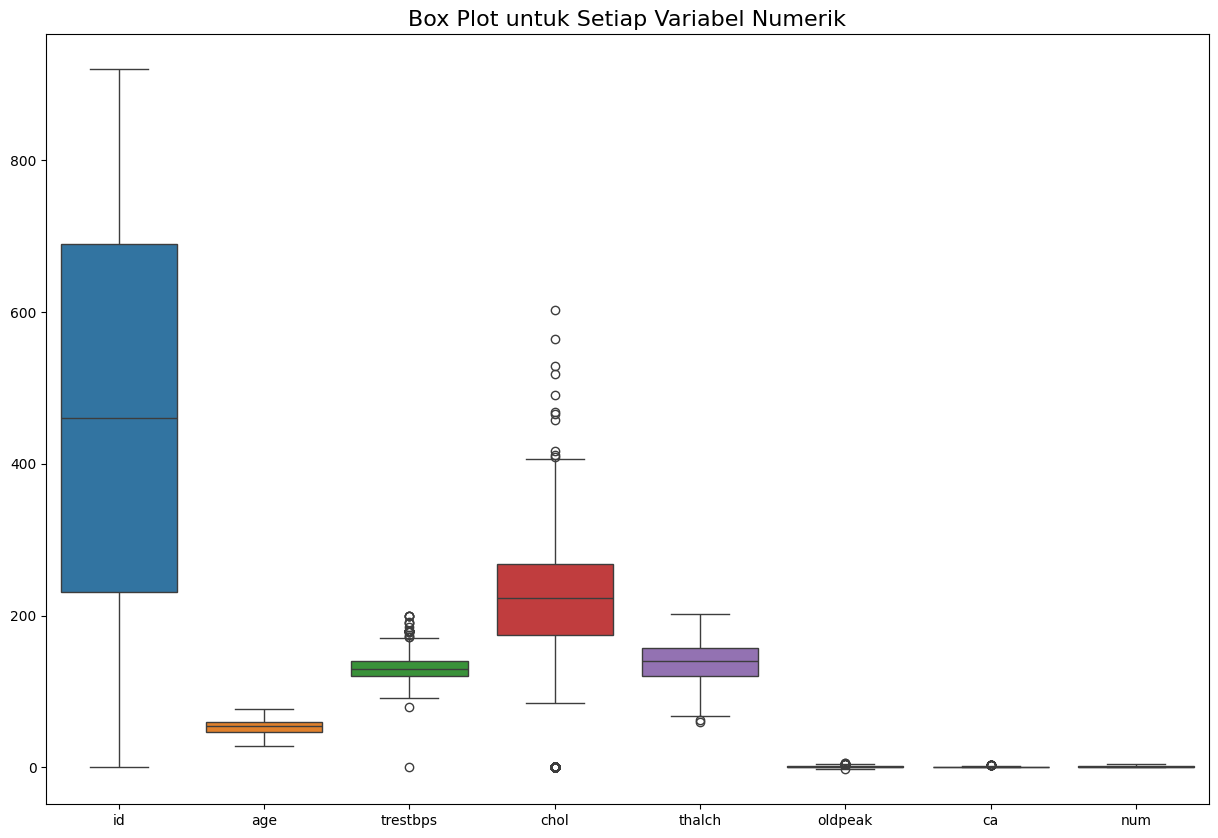

In [33]:
# Membuat box plot untuk setiap variabel numerik
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numerik)
plt.title('Box Plot untuk Setiap Variabel Numerik', fontsize=16)
plt.show()

Pasangan variabel dengan korelasi tertinggi: ('ca', 'num')
Nilai korelasi tertinggi: 0.5162163234345344


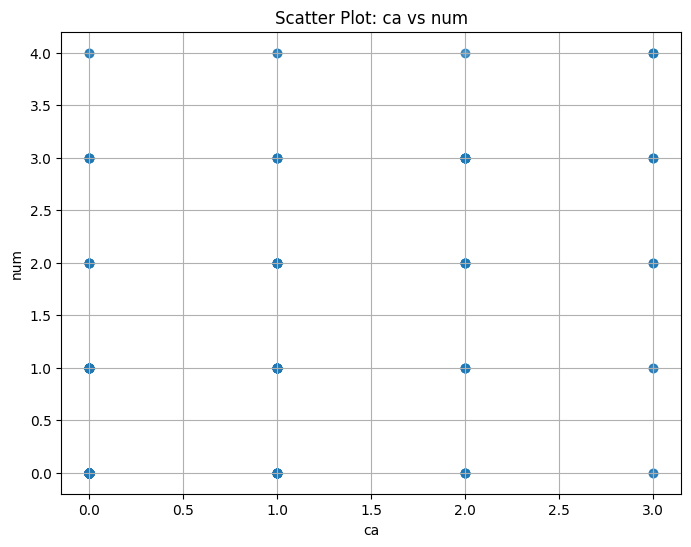

In [34]:
# Memilih hanya kolom numerik yang relevan
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
df_numerik = df_UCIHeartDiseaseData[numeric_columns]

# Menghitung matriks korelasi
correlation_matrix = df_numerik.corr()

# Menemukan pasangan variabel dengan korelasi tertinggi (di luar diagonal utama)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1].drop_duplicates()
highest_corr_pair = corr_pairs.idxmax()

# Menampilkan pasangan variabel dan nilai korelasi tertinggi
print("Pasangan variabel dengan korelasi tertinggi:", highest_corr_pair)
print("Nilai korelasi tertinggi:", corr_pairs.max())

# Membuat scatter plot untuk pasangan variabel dengan korelasi tertinggi
plt.figure(figsize=(8, 6))
plt.scatter(df_numerik[highest_corr_pair[0]], df_numerik[highest_corr_pair[1]], alpha=0.5)
plt.title(f'Scatter Plot: {highest_corr_pair[0]} vs {highest_corr_pair[1]}')
plt.xlabel(highest_corr_pair[0])
plt.ylabel(highest_corr_pair[1])
plt.grid(True)
plt.show()

## Laporan 
Berdasarkan pengelolahan data diatas, dapat dilihat bahwa dataset yang diolah memiliki tipe string dan integer artinya terdapat data kategorikal dan numerik.

RangeIndex: 920 entries, 0 to 919

Data columns (total 16 columns):

  Column      Non-Null   Count  Dtype   

 0   id        920 non-null    int64  

 1   age       920 non-null    int64  

 2   sex       920 non-null    object 

 3   dataset   920 non-null    object 

 4   cp        920 non-null    object 

 5   trestbps  861 non-null    float64

 6   chol      890 non-null    float64

 7   fbs       830 non-null    object 

 8   restecg   918 non-null    object 

 9   thalch    865 non-null    float64

 10  exang     865 non-null    object 

 11  oldpeak   858 non-null    float64

 12  slope     611 non-null    object 

 13  ca        309 non-null    float64

 14  thal      434 non-null    object 

 15  num       920 non-null    int64  

dtypes: float64(5), int64(3), object(8)

memory usage: 115.1+ KB

---  ------    --------------  ----- 

Selanjutnya, saya menemukan nilai yang hilang dari beberapa kategori seperti:

trestbps     59

chol         30

fbs          90

restecg       2

thalch       55

exang        55

oldpeak      62

slope       309

ca          611

thal        486

---  ------    --------------  ----- 

Kemudian, saya juga menemukan nilai Outlier (Nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data) seperti:

trestbps     28

chol        183

thalch        2

oldpeak      16

ca           20
